In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr

In [3]:
def extract(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(gray, cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('off')
    bfilter = cv2.bilateralFilter(gray, 100, 100, 1)
    edged = cv2.Canny(bfilter, 30, 200)
    axes[2].imshow(edged, cmap='gray')
    axes[2].set_title('Edged Image')
    axes[2].axis('off')
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 15, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2 + 1, y1:y2 + 1]
    axes[3].imshow(cropped_image, cmap='gray')
    axes[3].set_title('Cropped Text Area')
    axes[3].axis('off')
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img.copy(), text=text, org=(approx[0][0][0], approx[1][0][1] + 60),
                      fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(res, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    plt.tight_layout()
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.title('Result with Text')
    plt.axis('off')
    plt.show()
    print(text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


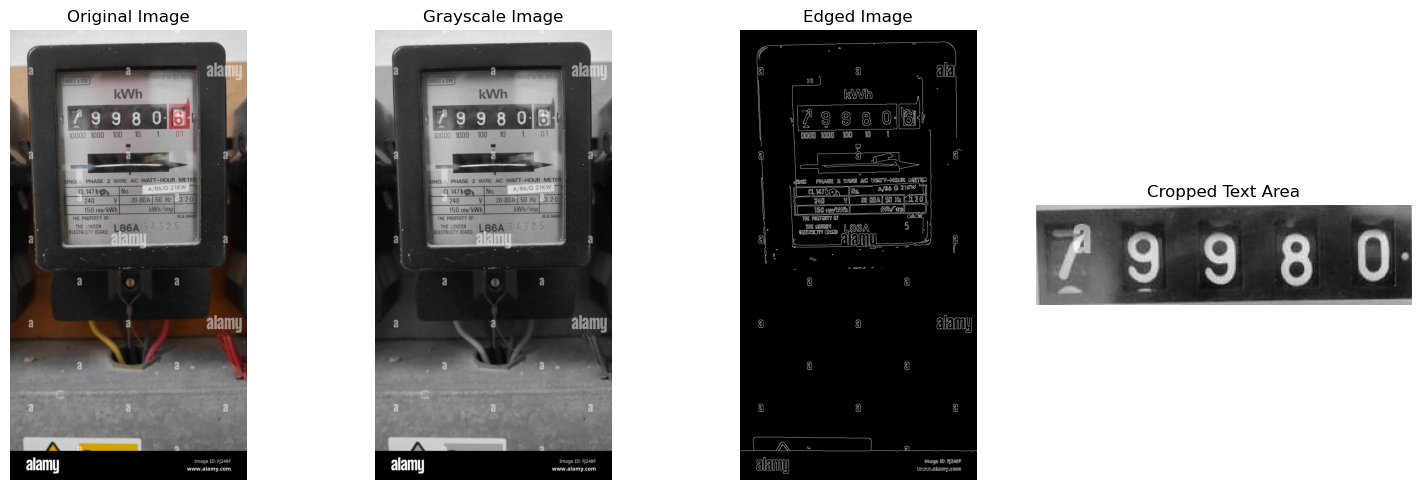

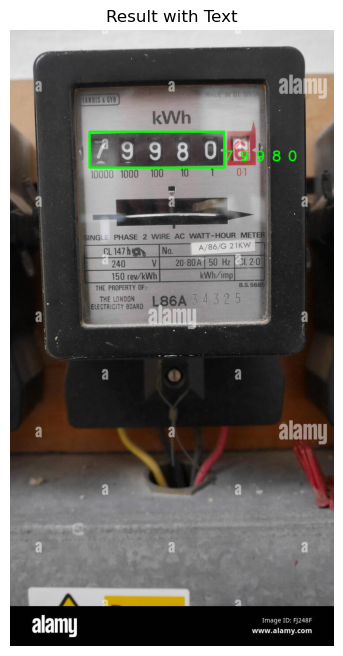

7 9 9 8 0


In [4]:
extract('m1.jpg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


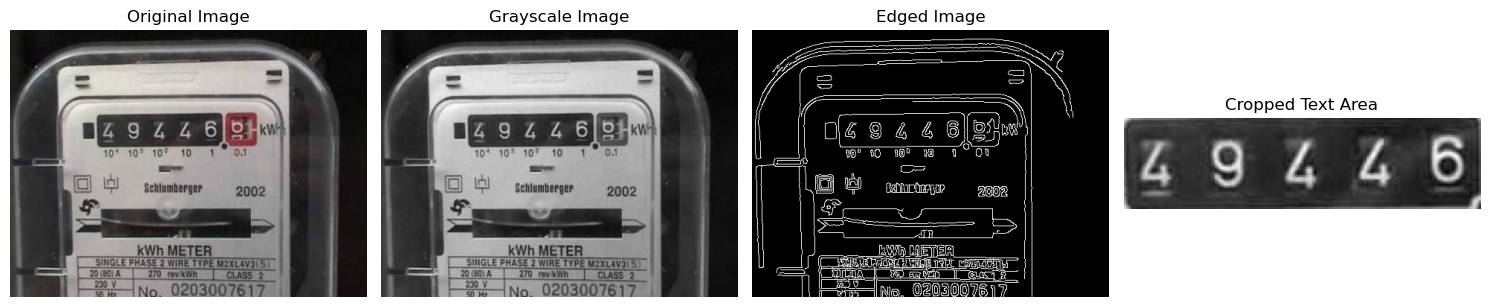

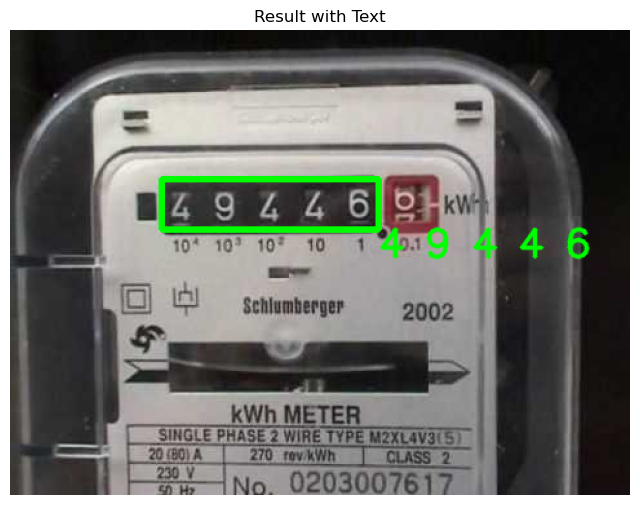

4 9 4 4 6


In [5]:
extract('m2.jpg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


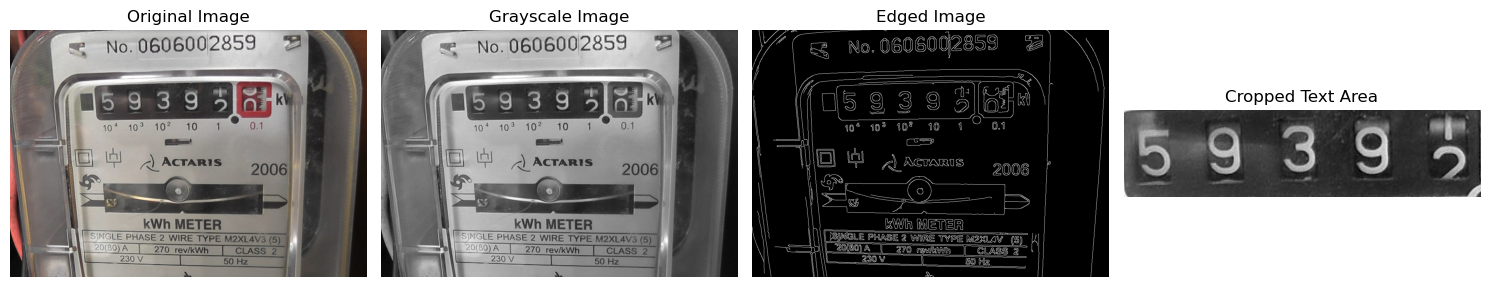

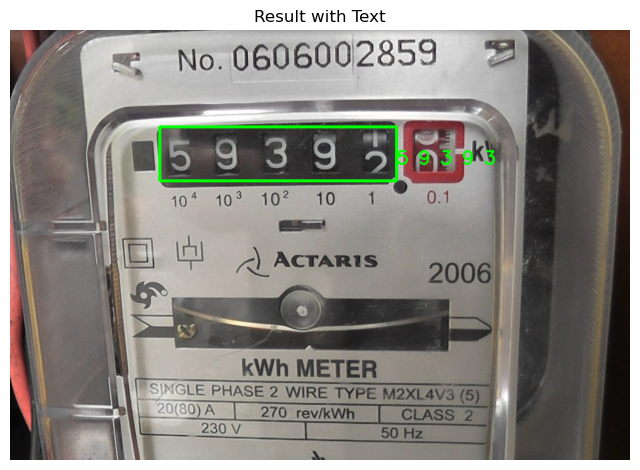

5 9 3 9 3


In [6]:
extract('m3.jpg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


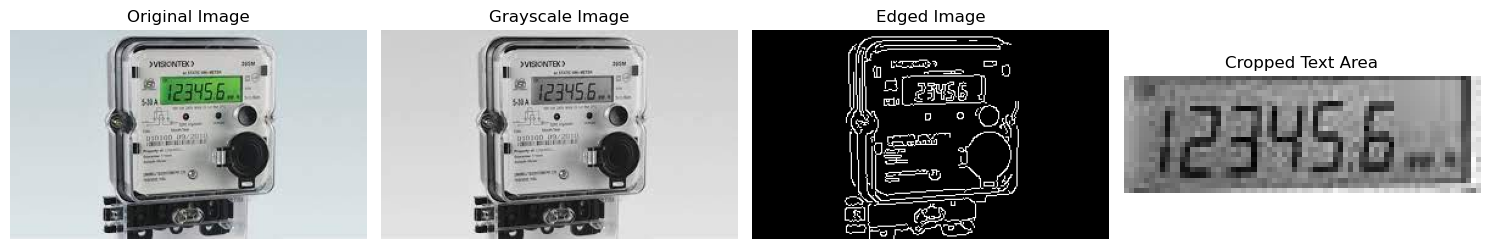

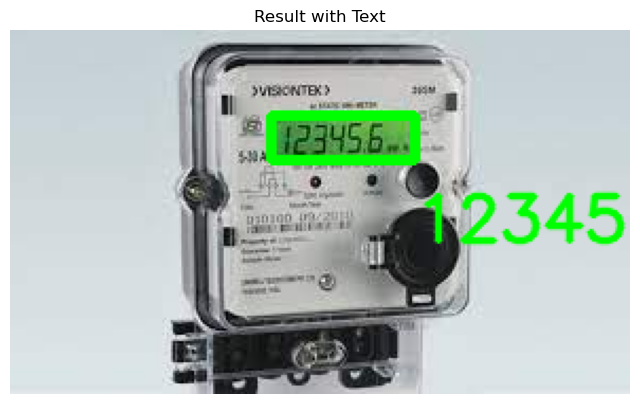

12345,6


In [7]:
extract('down.jpeg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


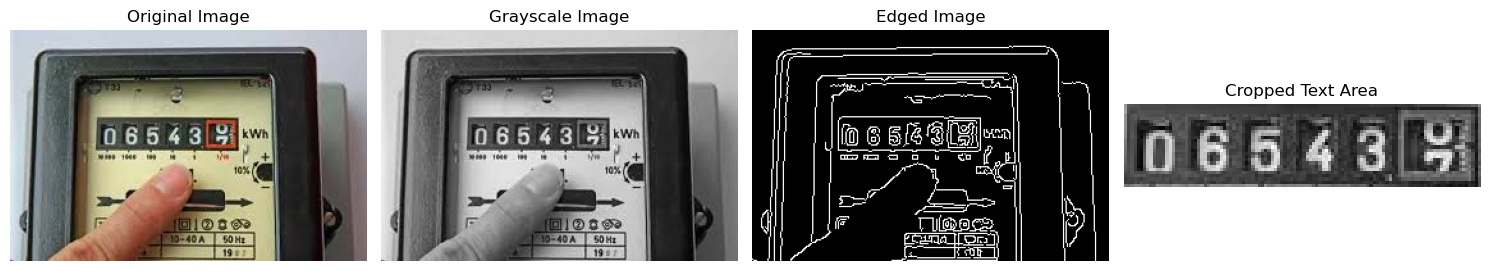

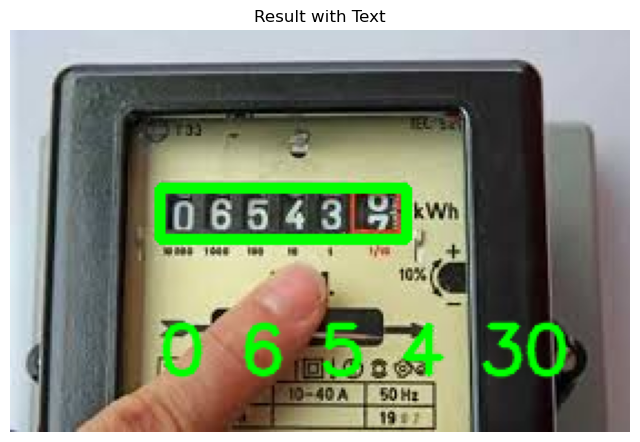

0 6 5 4 30


In [8]:
extract('m5.jpeg')